# Customer Segmentation and Analysis 
### Steps to solve the problem :
1. Importing Libraries
2. Exploration of data
3. Data Visualization
4. Clustering using K-Means
5. Selection of Clusters
6. Ploting the Clusters

In [1]:
#Importing all the wanted Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading in the Dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Performing EDA
df.shape

(200, 5)

In [4]:
#Checking the general information of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#To know general stats of a field/column.
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#If the Data Type of the columns aren't suitable for thier fucntionality we will change it.
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
#Checking for Null Values.
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
#Checking for duplicated rows.
df.duplicated().sum()

0

In [9]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [10]:
df.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


In [11]:
#Choosing a Theme for Visualisation.
plt.style.use('fivethirtyeight')

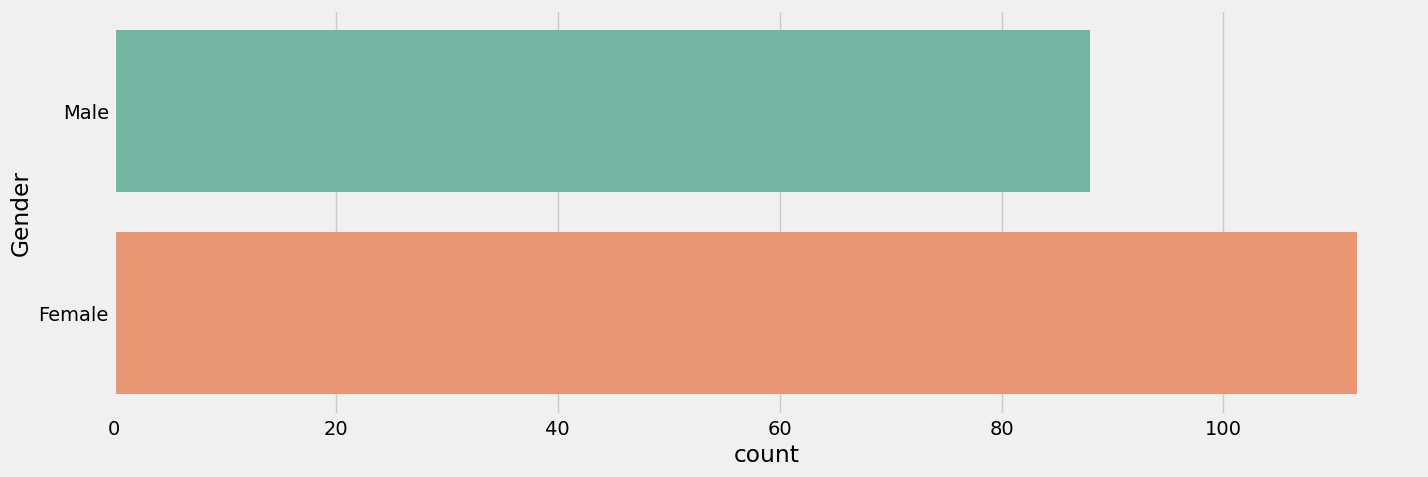

In [12]:
#Count Plot for Gender
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df, palette = 'Set2')
plt.show()

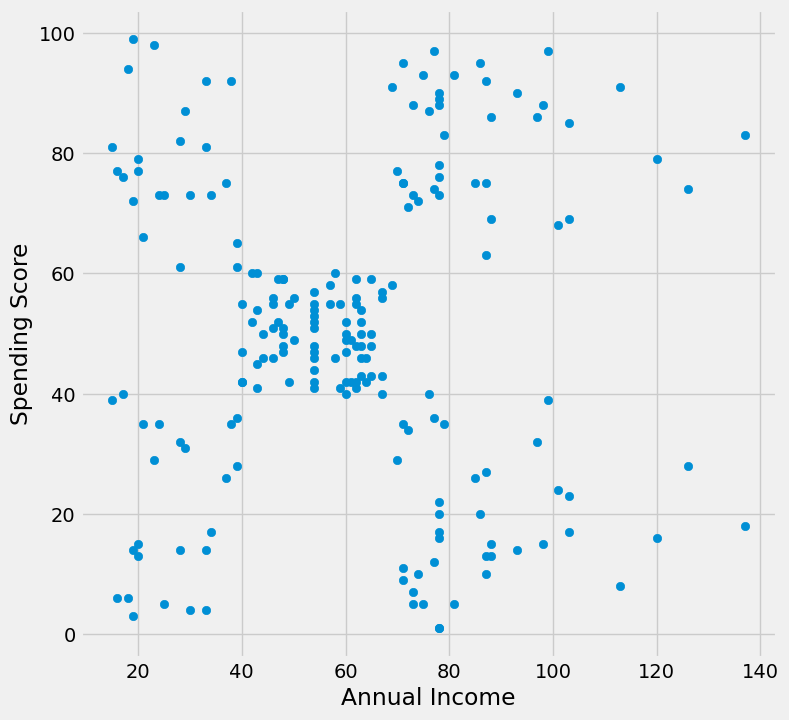

In [13]:
#Plotting the Annual Income Column vs the Spending Score
plt.figure(figsize = (8, 8))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

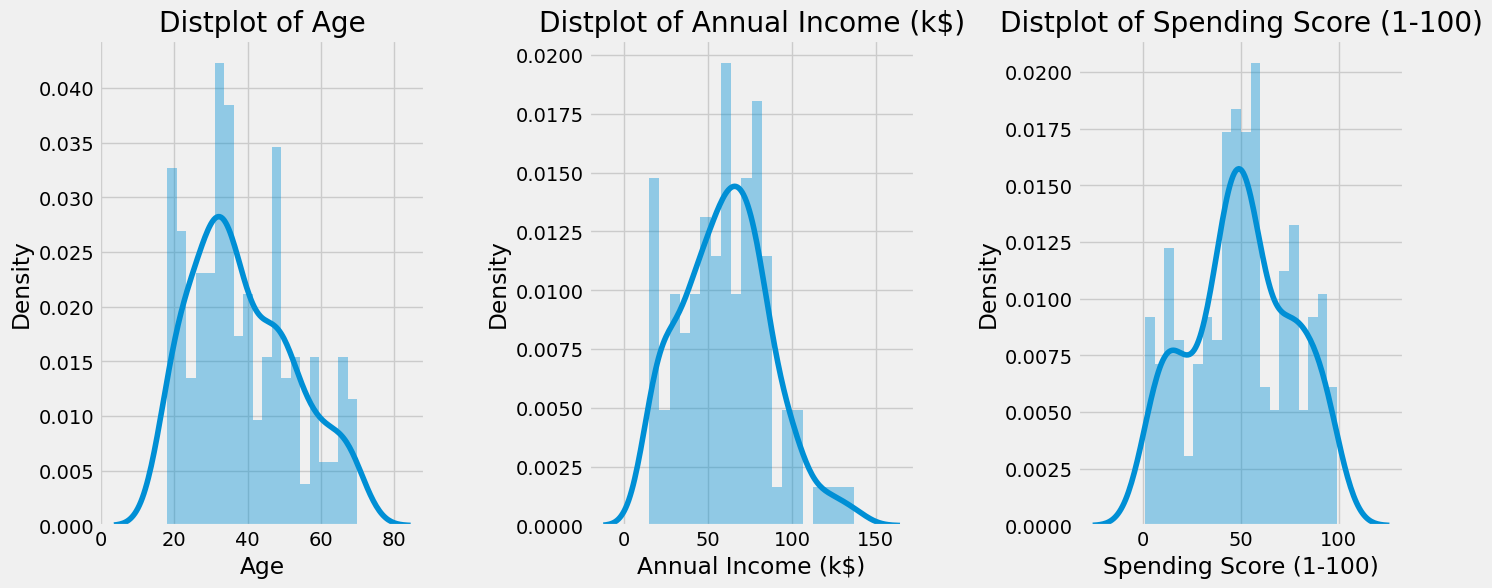

In [14]:
#Plotting Histograms to know the distibution/skewness of the columns.
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

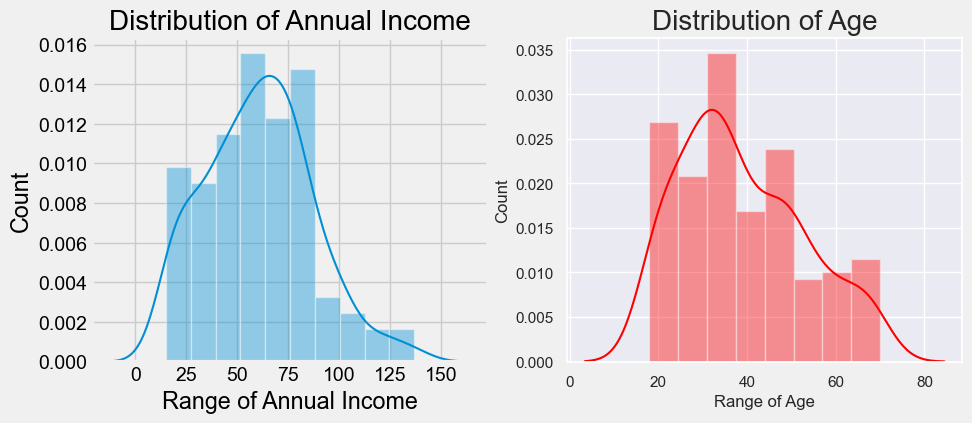

In [15]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.set(style = 'darkgrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.set(style = 'dark')
sns.distplot(df['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

In the above Plots we see the Distribution pattern of Annual Income and Age.
By looking at the plots:

We understand that there are very few people who earn more than 100.
Most of the people have an earning of around 50-75. Also, we can say that the least Income is around 20.

The Regular Customers for the Mall has age around 30-35 years of age. Whereas the the senior citizens
age group is the least frequent visitor in the Mall.

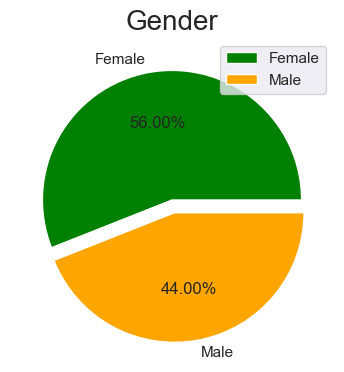

In [16]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['green', 'orange']
explode = [0, 0.1]

plt.figure(figsize=(4, 4))
plt.pie(size, colors = colors, explode = explode, labels = labels, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.legend(loc='upper right')
plt.show()

In [17]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
print(corr_matrix)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


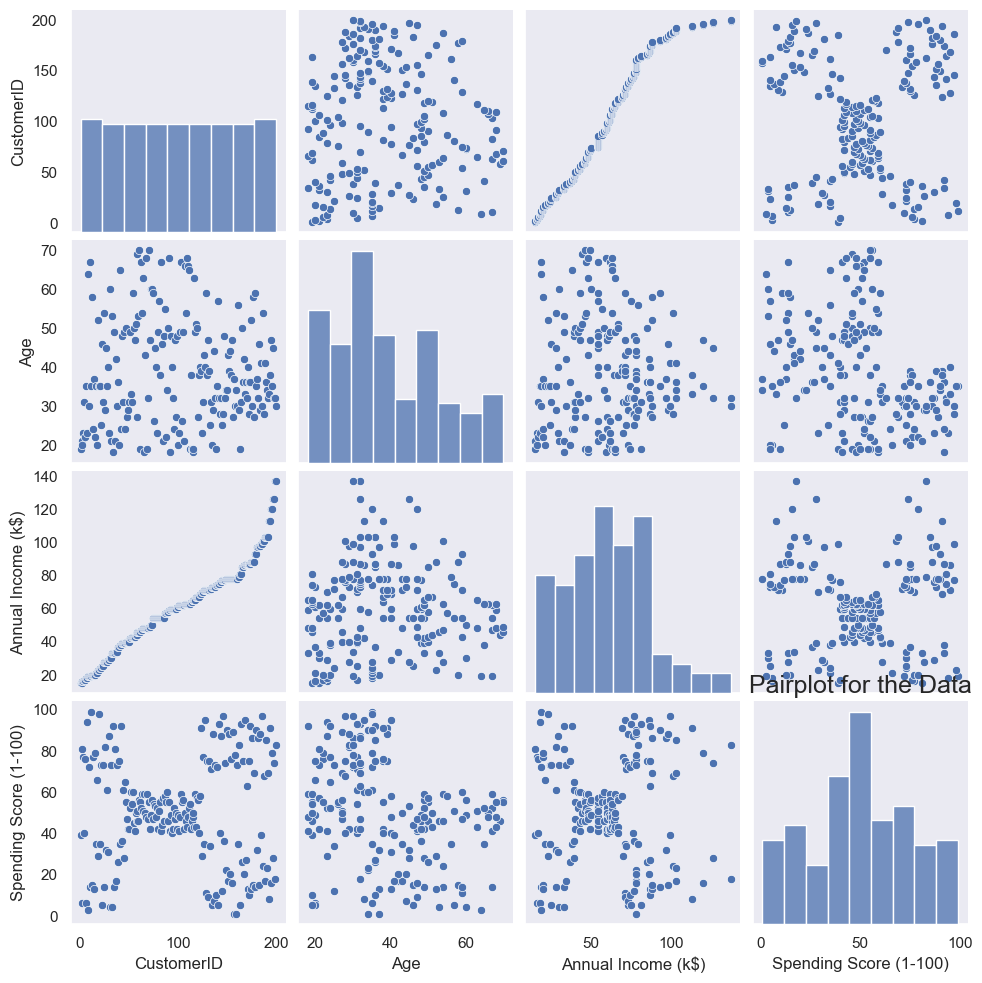

In [18]:
#Pair Plot to understand the relationships between different variables.
sns.pairplot(df)
plt.title('Pairplot for the Data', fontsize = 18)
plt.show()

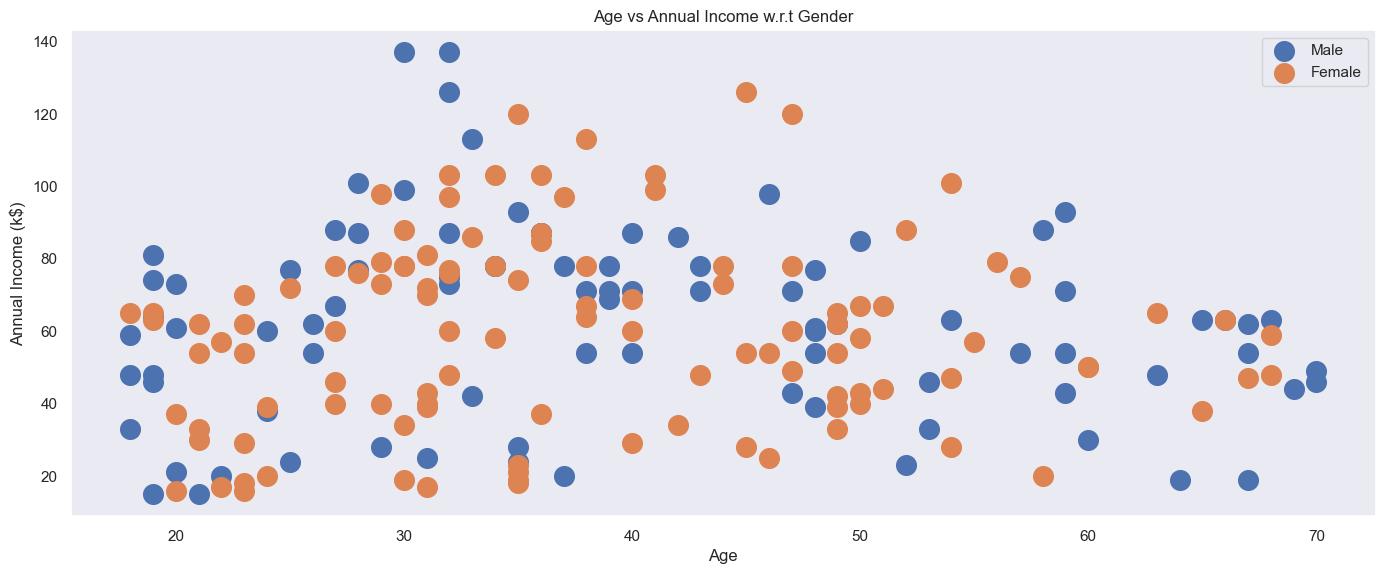

In [19]:
#Plotting a Scatter Plot to Analyze the relationship between Age and Annual Income with respect to Gender.
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

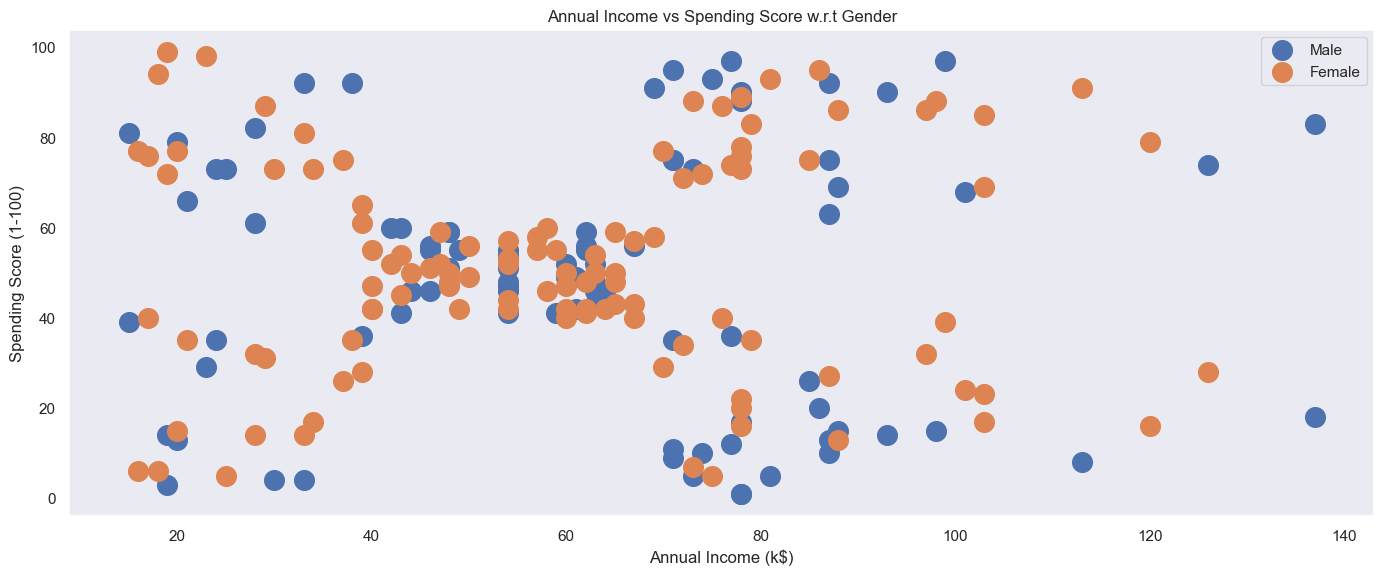

In [20]:
#Plotting Scatter Plot to Analyze the relationship between Annual Income and Spending Score with respect to Gender.
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] , s = 200, label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

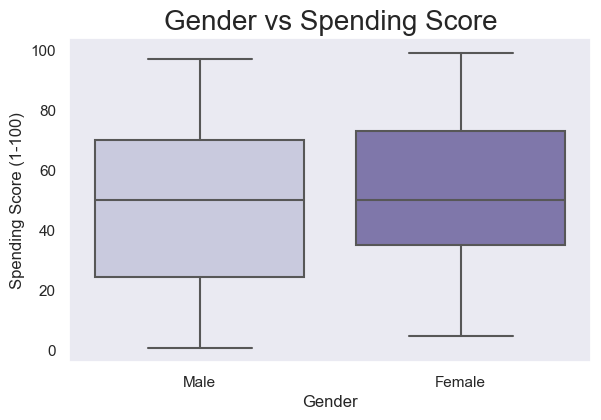

In [21]:
#Gender vs Spendscore
plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='Purples')
plt.title('Gender vs Spending Score', fontsize=20)
plt.show()

Applying K-means

In [22]:
#Feature Selecting only 2 features i.e. Annual Income and Spending Score
X1 = df.iloc[:, [3,4]].values

In [23]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=4)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

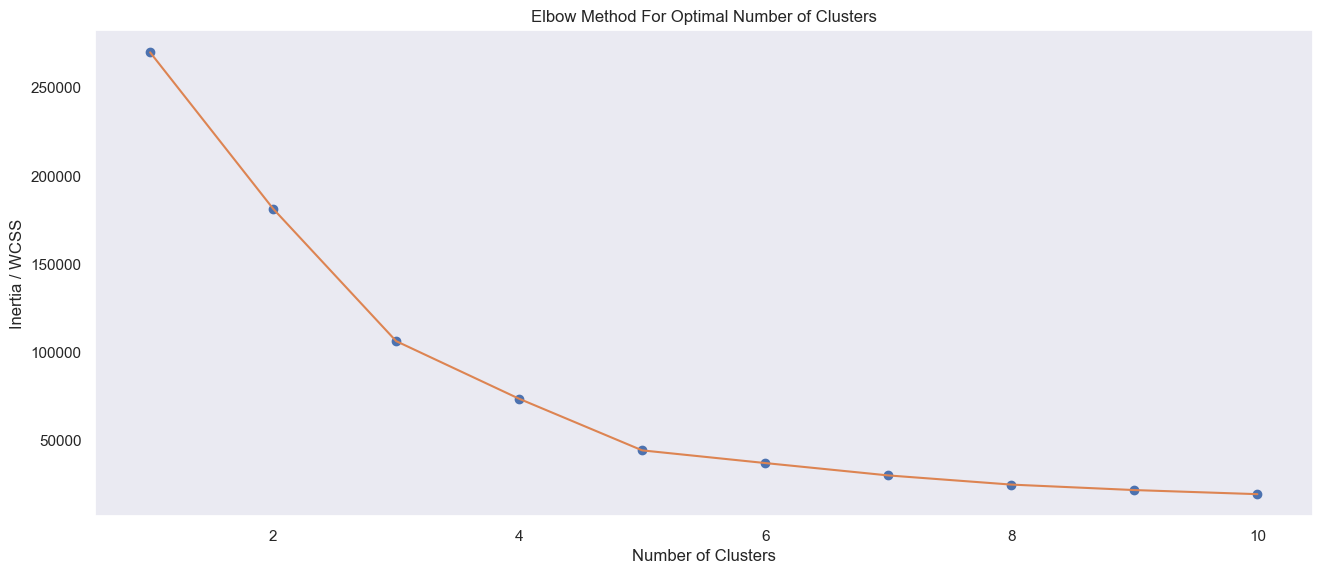

In [24]:
plt.figure(figsize=(14, 6))
plt.plot(np.arange(1, 11), wcss, 'o')
plt.plot(np.arange(1, 11), wcss, '-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia / WCSS')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

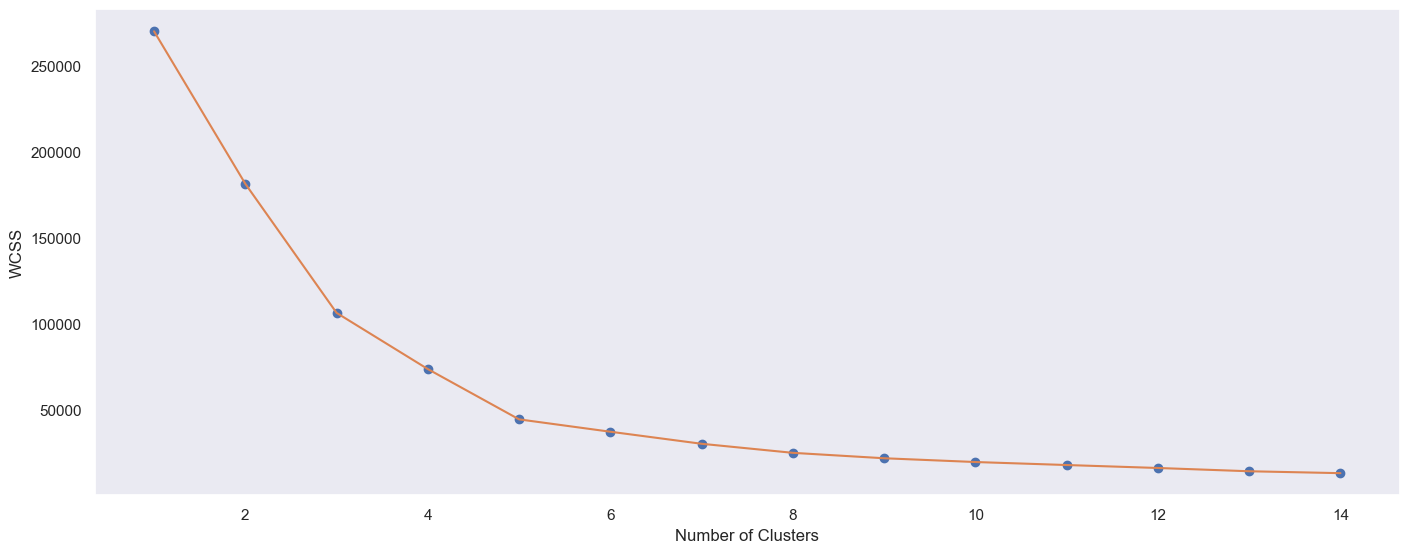

In [25]:
wcss = []  # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters=k)
    kmeansForLoop.fit(X1)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize=(15, 6))
plt.plot(np.arange(1, 15), wcss, 'o')
plt.plot(np.arange(1, 15), wcss, '-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Looking at this curve we see that elbow comes at k=5

In [26]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X1)

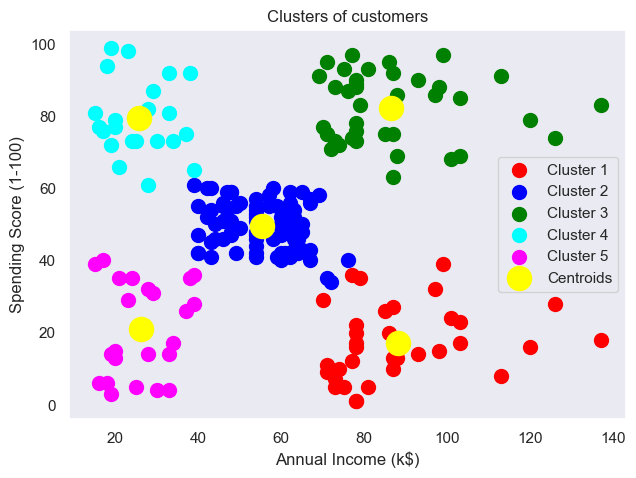

In [27]:
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X1[y_kmeans == 3, 0], X1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X1[y_kmeans == 4, 0], X1[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], 
            s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall.

There are clearly Five segments of Customers.
Based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the behaviors of a customer in a Mall.

Understanding the Model created by the Model:

Cluster 1 (Red) - Earning High, Spending Less

Cluster 2 (Blue) - Average Earning and Average Spending

Cluster 3 (Green) - Earning High, Spending High

Cluster 4 (Cyan) - Earning Less, Spending High

Cluster 5 (Magenta) - Less Earning, Less Spending

Clusters of Customers Based on their Ages


In [28]:
Age_DF = df.iloc[:, [2, 4]].values
Age_DF.shape

(200, 2)

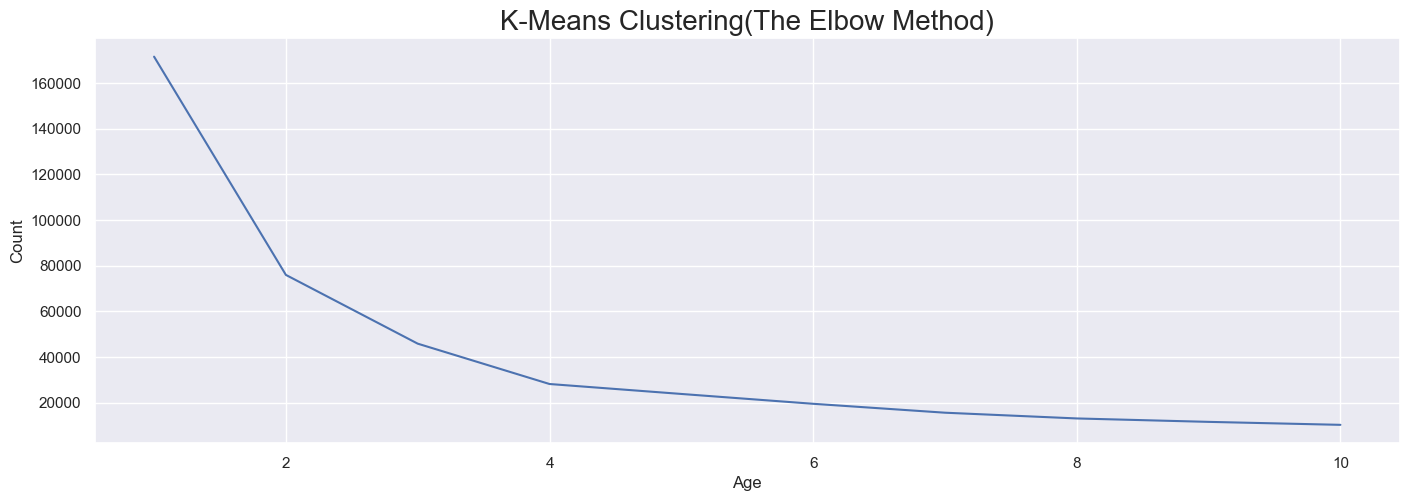

In [29]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(Age_DF)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

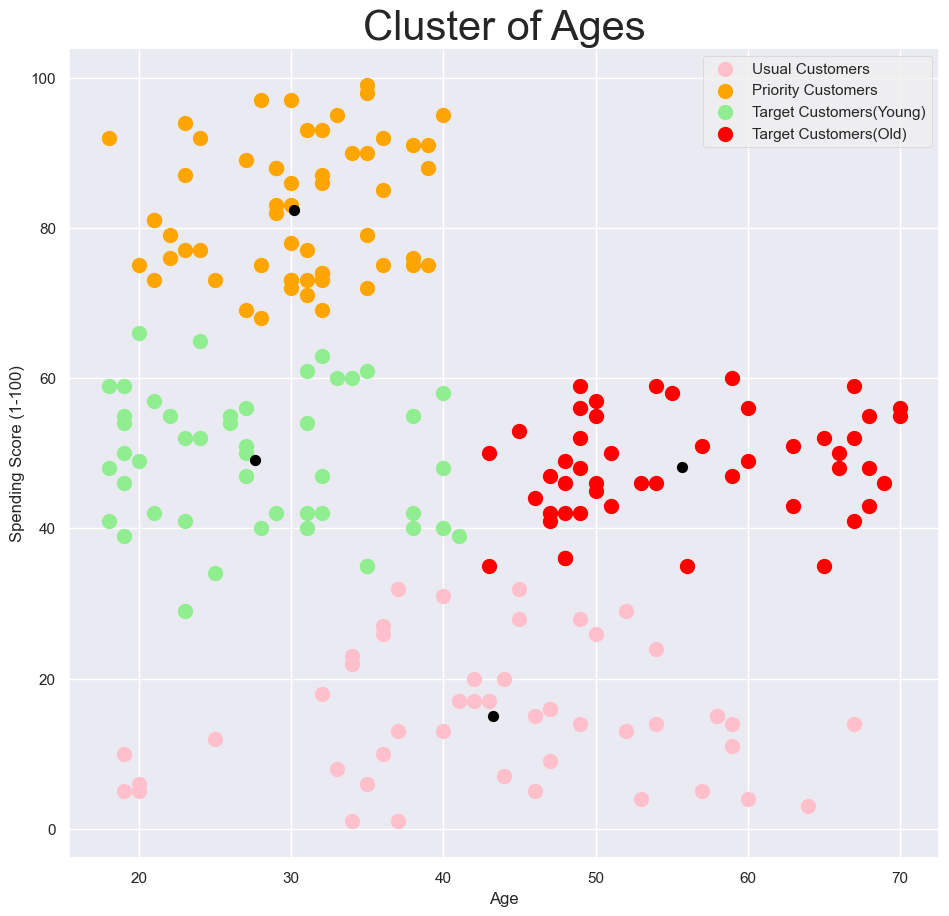

In [30]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(Age_DF)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(Age_DF[ymeans == 0, 0], Age_DF[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(Age_DF[ymeans == 1, 0], Age_DF[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(Age_DF[ymeans == 2, 0], Age_DF[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(Age_DF[ymeans == 3, 0], Age_DF[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

Customer Segmentation based on thier Age and Spending Score:

We have successfully utilized Clustering Analysis on the dataset indentifying them into
different clusters. These clusters will have thier own marketing strategies.

1. Usaul Customers: They are a significant portion of our Revenue. Giving them constant
   incentives to shop more will be ideal. They might not be top spenders but are our
   recurring customers.
   Startegies:
   A. Loyalty Programs: To encourage repeated purchases and increase thier spending.
   B. Regular Promotions: Regular offers and discounts to retain thier engagement.
   C.Feedback: Constructive criticism goes a long way.
2. High Values Customers: These customers have high spending score and generate the
   majority of our revenue.
   Strategies:
   A. Exclusive Offers: Provide personalised/ exclusive offers, eary access to new products.
   B. VIP Treatment: Prioty check out lanes, personalised shopping assitance.
   C. Refferal Programs: Encourage them to reffer to friends for rewards.
3. Senior Citizens: Older adults with varying spending score. They probably prefer
   convenience over quality or quantity.
   Strategies:
   A. Senior Discounts: Special discounts for the elderly.
   B. Comfort and Accessibility: Ensure comfortable seating and easy navigation.
4. Young Customers: Can be a potential high spending score customers who are
   often influenced by trends and technology.
   Strategies:
   A. Engaging Experiences: Create engaging shopping experiences with events,
   tech intergrated products.
   B. Social Media Marketing: Using social media platforms to reach out with
   trendy products, having influencers endorse our products.
   C. Student Discount: Offering discount on thier student id and having group
   discounts for multiple students.

Conclusion: This categorization helps use develop targeted marketing which alures
to each groups unique preferences and behavior. This optimizes our spending score
while retaining the customers in our mall.